# 1) Import required modules

In [68]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 120

from fbprophet.plot import add_changepoints_to_plot
import itertools
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 2) Read the data and do the basic EDA

1. Read the data, convert the date column to date format and set it as index
2. Look at the sample data after dropping na rows
3. Start the data from 2005
4. Plot the input series

## Read the data

In [73]:
pg_rps = pd.read_csv('../data/PG_RevenuePerShare.csv', parse_dates=['Date'], infer_datetime_format=True, index_col='Date')
pg_rps.dropna(inplace=True)
pg_rps = pg_rps.loc["2005":]
pg_rps.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/PG_RevenuePerShare.csv'

## Plot the input series

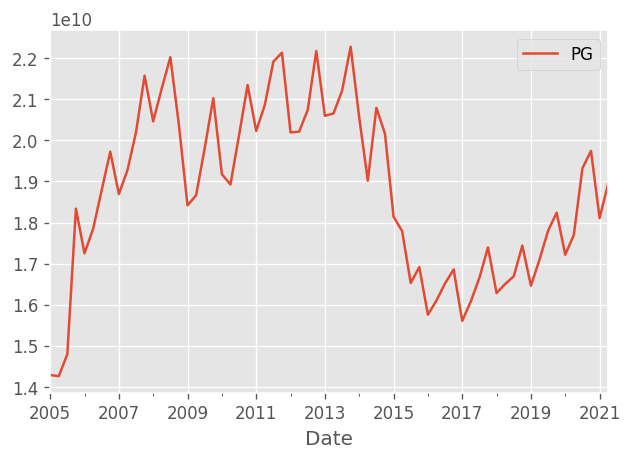

In [21]:
pg_rps.plot()
plt.show()

# 3) Timeseries Decomposition

1. Decompose the timeseries
2. Look at the ACF plot
3. Look at the PACF plot

## Decomposition

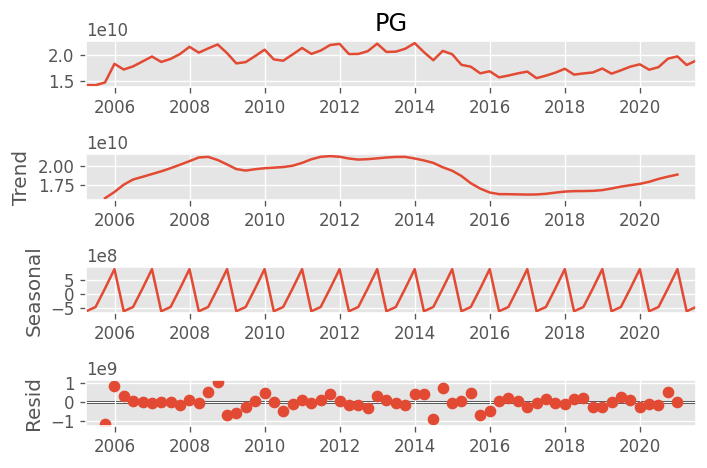

In [22]:
result = seasonal_decompose(pg_rps['PG'])
fig = result.plot()

## ACF Plot

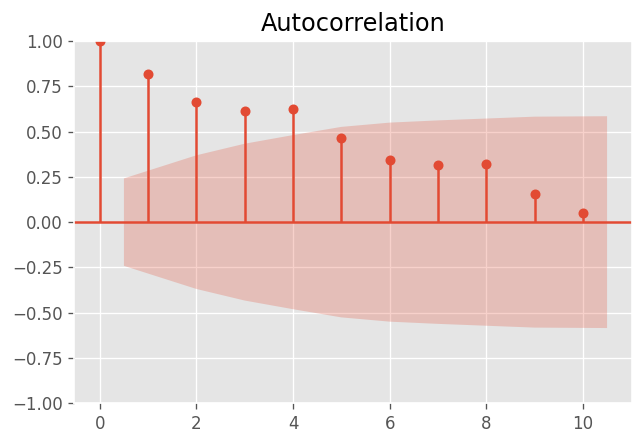

In [23]:
fig1 = plot_acf(pg_rps, lags=10)

## PACF Plot

/Users/mahendra/.pyenv/versions/3.9.7/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


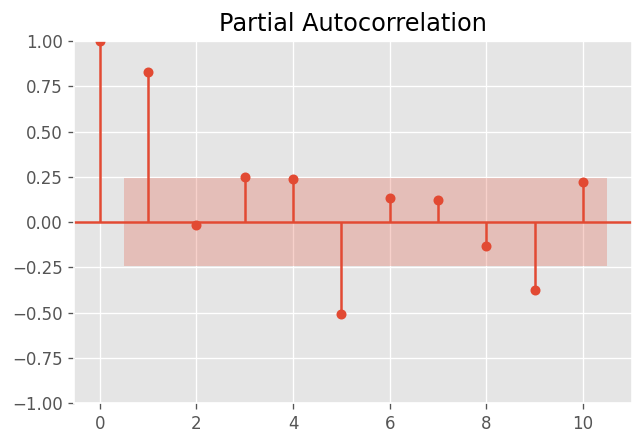

In [24]:
fig2 = plot_pacf(pg_rps, lags=10)

# 4) Create a function that does the following steps

1. Create copy of the passed data
2. Drop all NAs rows
3. Reset index
4. rename columns to [ 'ds', 'y' ]

In [46]:
def prep_data(frame):
  train_data = frame.copy()
  print(train_data.head())
  train_data = train_data.reset_index()
  print(train_data.head())

  train_data.columns = ['ds', 'y']

  return train_data

In [54]:
train_data = prep_data(pg_rps)
train_data.tail()

                      PG
Date                    
2005-03-31  1.428700e+10
2005-06-30  1.425800e+10
2005-09-30  1.479300e+10
2005-12-31  1.833700e+10
2006-03-31  1.725000e+10
        Date            PG
0 2005-03-31  1.428700e+10
1 2005-06-30  1.425800e+10
2 2005-09-30  1.479300e+10
3 2005-12-31  1.833700e+10
4 2006-03-31  1.725000e+10


,ds,y
61,2020-06-30,1.769800e+10
62,2020-09-30,1.931800e+10
63,2020-12-31,1.974500e+10
64,2021-03-31,1.810900e+10
65,2021-06-30,1.894600e+10


# 5) Basic FB prophet model

1. Fit the model
2. Create data frame to get forecasts
3. Get the forecasts
4. Plot the actuals and preds

## Fit the model

In [28]:
m = Prophet()
m.fit(train_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/mahendra/.pyenv/versions/3.9.7/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -75.6091


Iteration  1. Log joint probability =    61.4803. Improved by 137.089.
Iteration  2. Log joint probability =     68.606. Improved by 7.12569.
Iteration  3. Log joint probability =    113.971. Improved by 45.3648.
Iteration  4. Log joint probability =    114.029. Improved by 0.0583631.
Iteration  5. Log joint probability =    114.093. Improved by 0.0633326.
Iteration  6. Log joint probability =    114.187. Improved by 0.0945664.
Iteration  7. Log joint probability =    114.274. Improved by 0.0870049.
Iteration  8. Log joint probability =     114.32. Improved by 0.0459553.
Iteration  9. Log joint probability =     114.53. Improved by 0.210212.
Iteration 10. Log joint probability =    114.589. Improved by 0.0582598.
Iteration 11. Log joint probability =    114.675. Improved by 0.085949.
Iteration 12. Log joint probability =    115.398. Improved by 0.723262.
Iteration 13. Log joint probability =    115.402. Improved by 0.00436049.
Iteration 14. Log joint probability =    115.461. Improved 

## Dataframe to make predictions

In [49]:
future = m.make_future_dataframe(periods=10, freq='Q')
future.tail()

,ds
71,2022-12-31
72,2023-03-31
73,2023-06-30
74,2023-09-30
75,2023-12-31


## Predictions

In [50]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/Users/mahendra/.pyenv/versions/3.9.7/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/mahendra/.pyenv/versions/3.9.7/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
71,2022-12-31,1.746691e+10,1.550851e+10,1.935489e+10
72,2023-03-31,1.591212e+10,1.396525e+10,1.783612e+10
73,2023-06-30,1.597495e+10,1.390251e+10,1.789559e+10
74,2023-09-30,1.643145e+10,1.450711e+10,1.835418e+10
75,2023-12-31,1.709292e+10,1.522847e+10,1.906956e+10


## Plot the model's performance on train data and forecasts

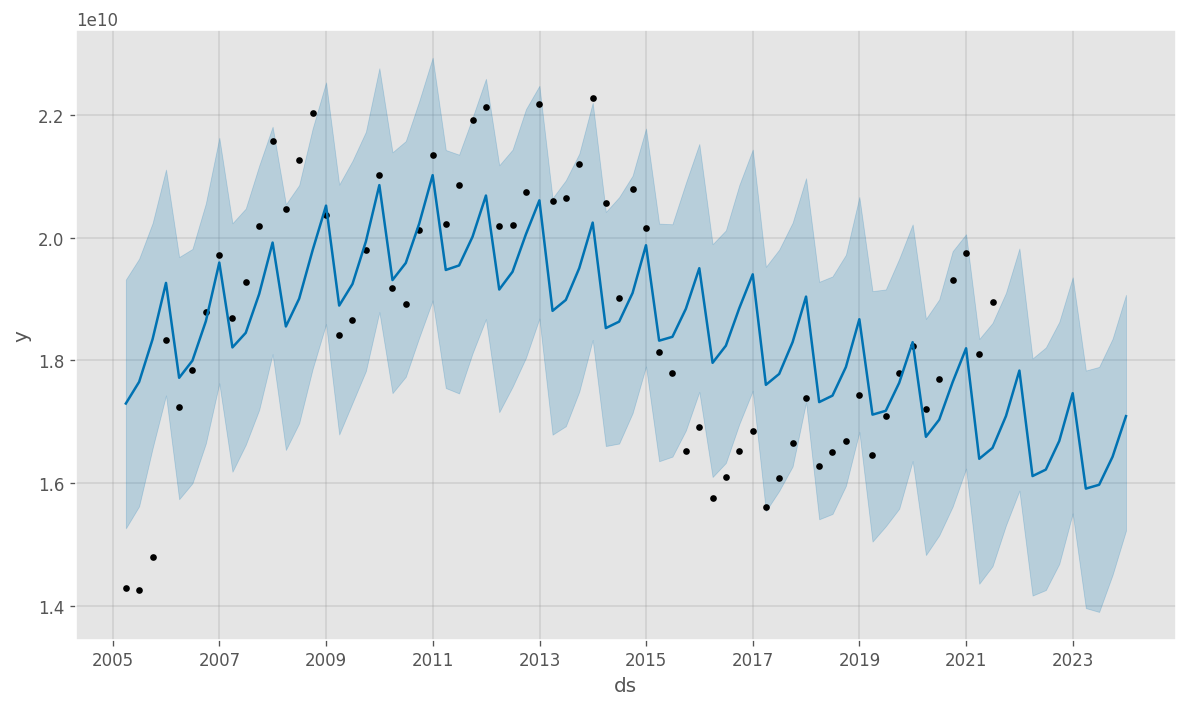

In [52]:
fig=m.plot(forecast)

## Components of series

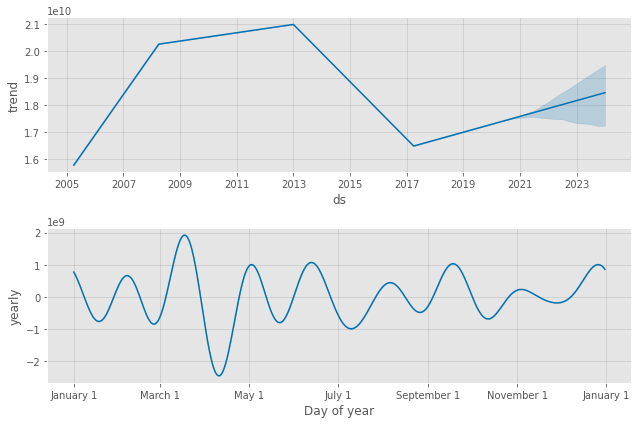

# 6) Tuning the Prophet model

1. Split the data into train test data last 5% as test
2. From the train split the train and validation (80 train, 20 test)
3. Define the parameter grid
4. Get all the parameter combinations
5. Run the loop to collect performance numbers

## Process the data to fit fbprophet

In [66]:
# X = train_data.drop('y', axis=1).copy()
# y = train_data['y'].copy()
full_train_data, test_data = train_test_split(train_data, test_size=0.05, random_state=42, shuffle=False)

## Split the data into full train and test

In [67]:
train, vldt = train_test_split(full_train_data, test_size=0.2, random_state=42, shuffle=False)
print(train.shape)
print(vldt.shape)

(49, 2)
(13, 2)


## Split the data into train and validation

Train shape: (12, 2)
Val Shape: (50, 2)


In [ ]:
Prophet?

## Design the parameter grid

In [ ]:
param_grid = {  
    'changepoint_prior_scale': [0.01, 0.1],
    'seasonality_prior_scale': [0.01, 0.1],
    'seasonality_mode': ['multiplicative','additive'],
    'uncertainty_samples' : [100, 500]
}

## Get all the parameter combinations

{'changepoint_prior_scale': 0.01,
 'seasonality_mode': 'multiplicative',
 'seasonality_prior_scale': 0.01,
 'uncertainty_samples': 100}

## Fit the model on all parameter combinations

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run pr

# 7) Use the best parms to fit on full train data

1. Sort the performance values to identify the best params
2. Subset the best params
3. Fit the model using best params
4. Plot the forecasts

## Sort the performance numbers to find the best params

,changepoint_prior_scale,seasonality_prior_scale,seasonality_mode,uncertainty_samples,mape
14,0.10,0.10,additive,100,0.639485
15,0.10,0.10,additive,500,0.639485
12,0.10,0.10,multiplicative,100,0.640949
13,0.10,0.10,multiplicative,500,0.640949
10,0.10,0.01,additive,100,0.683637
11,0.10,0.01,additive,500,0.683637
8,0.10,0.01,multiplicative,100,0.689964
9,0.10,0.01,multiplicative,500,0.689964
4,0.01,0.10,multiplicative,100,0.923706
5,0.01,0.10,multiplicative,500,0.923706


## Subset the best params

{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive', 'uncertainty_samples': 100}


## Fit the model with best params

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


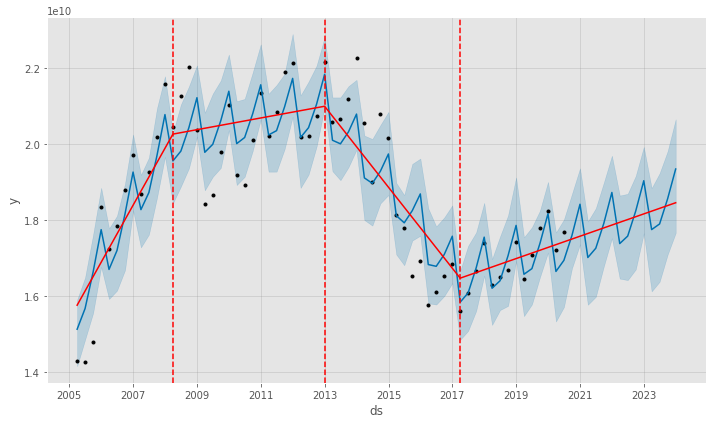

## Plot the forecasts

## Plot the components

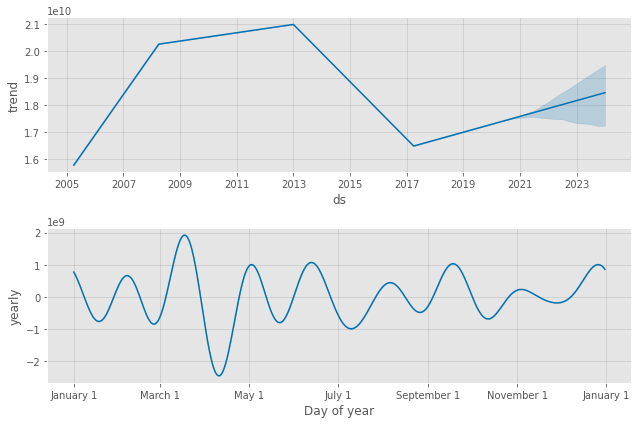

# 8) Test Predictions

1. Make the predictions on test
2. Plot the test predictions

## Make the predictions on test

,ds,y,yhat
0,2020-09-30,1.931800e+10,1.759671e+10
1,2020-12-31,1.974500e+10,1.841975e+10
2,2021-03-31,1.810900e+10,1.701617e+10
3,2021-06-30,1.894600e+10,1.726081e+10


## Plot the test forecasts

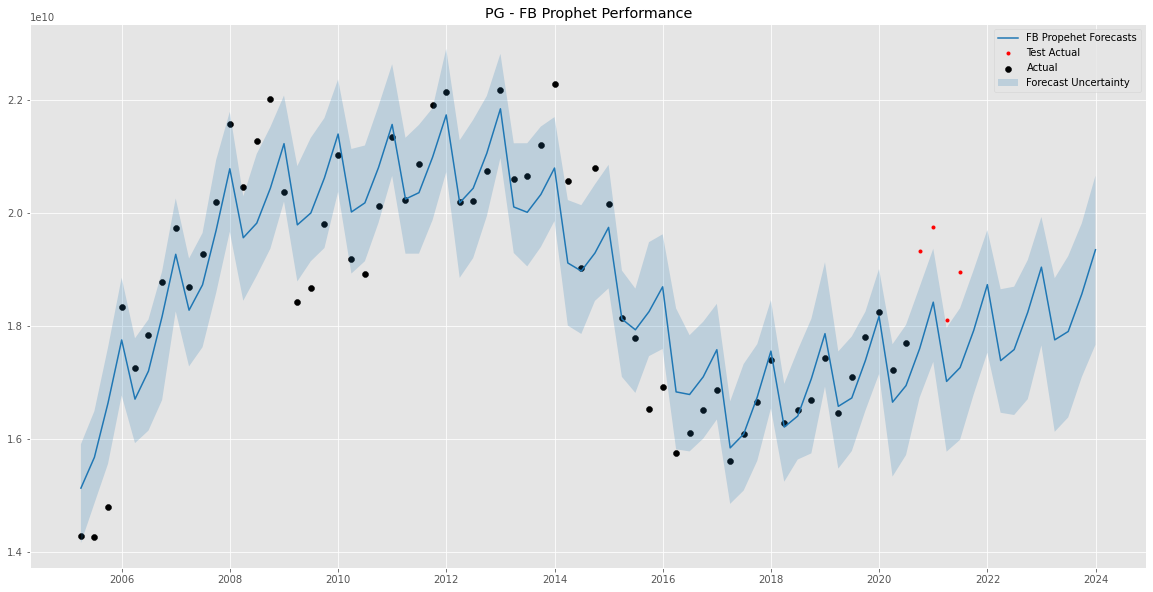